<a href="https://colab.research.google.com/github/revathi-prasad/ai-safety-usc-fellowship/blob/main/AUROC_from_Scratch_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate test data
# Fraction of labels that are positive
balance = 0.1

# No correlation between x and y
y_pred_rand = np.random.rand(1000)
y_true_rand = np.random.binomial(n=1, p=balance, size=1000)

# Positive correlation between x and y
y_true_corr = np.random.binomial(n=1, p=balance, size=1000)
y_pred_corr = np.random.rand(1000) + np.random.rand(1000) * y_true_corr

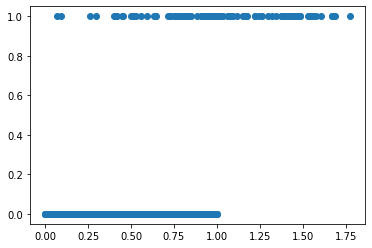

In [4]:
# Explore the dataset with plt
plt.scatter(y_pred_corr, y_true_corr)
# plt.hist()
plt.show()

In [5]:
def compute_metrics(y_pred, y_true, threshold):
    # Calculate TPR and FPR for a given threshold
    y_pred=np.where(y_pred>threshold,1,0)
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for i in range(len(y_pred)):
        if y_pred[i]==1 and y_true[i]==1:
          tp+=1
        elif y_pred[i]==1 and y_true[i]==0:
          fp+=1
        elif y_pred[i]==0 and y_true[i]==0:
          tn+=1
        elif y_pred[i]==0 and y_true[i]==1:
          fn+=1
    
    tpr = tp/(tp+tn)
    fpr = fp/(tp+tn)

    return tpr, fpr

In [6]:
compute_metrics(y_pred_corr,y_true_corr,0.5)

(0.17234848484848486, 0.875)

In [7]:
def plot_roc(y_pred, y_true, eps):
    """
    Plots the AUROC curve 
    eps is the difference between each tested threshold
    """

    tpr_array, fpr_array = [], []

    for threshold in np.arange(0, 2, eps):
        tpr, fpr = compute_metrics(y_pred,y_true,threshold)
        tpr_array.append(tpr)
        fpr_array.append(fpr)

    # TODO: Plot the curve!
    # Bonus: Also plot a straight line along x=y
    plt.plot(fpr_array, tpr_array)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    return tpr_array, fpr_array

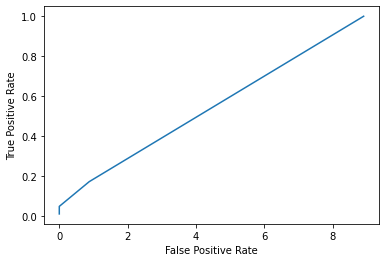

In [8]:
# Call the above function
tpr_array, fpr_array = plot_roc(y_pred_corr, y_true_corr, 0.5)

In [9]:
# def calculate_auroc(tpr_array, fpr_array):
#     # Use the trapezoid rule to find the integral of the curve
#     # See here: https://numpy.org/doc/stable/reference/generated/numpy.trapz.html
#     return sum(np.trapz(tpr_array,fpr_array))+1

In [ ]:
# calculate_auroc(tpr_array, fpr_array)

In [ ]:
# from sklearn.metrics import roc_auc_score

# # Check your work!
# roc_auc_score(y_pred_corr, y_true_corr)